Problem 1: Logistic Regression and CIFAR-10.  In this problem you will explore the datasetCIFAR-10, and you will use multinomial (multi-label) Logistic Regression to try to classify it.  Youwill also explore visualizing the solution.

Use  the fetch_openml command  from sklearn.datasets to  import  the  CIFAR-10-Smalldata set.

In [6]:
#do this rarely, it takes a while to run
from sklearn.datasets import fetch_openml
data = fetch_openml(data_id=40926)

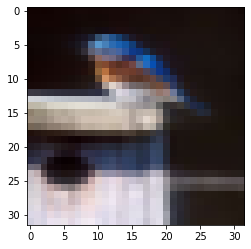

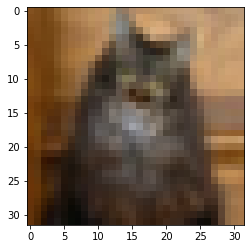

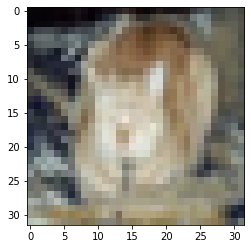

In [58]:
import matplotlib.pyplot as plt

sample_img_arr = data["data"].reshape(len(data["data"]), 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8")
fig1 = plt.imshow(sample_img_arr[13], interpolation='nearest')
plt.show()
fig2 = plt.imshow(sample_img_arr[26], interpolation='nearest')
plt.show()
fig3 = plt.imshow(sample_img_arr[33], interpolation='nearest')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["data"],data["target"], train_size=.75, test_size=0.25)


In [89]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(penalty="l1", solver='saga', tol=.01, multi_class="multinomial", n_jobs=8)
logreg.fit(X_train,y_train)
y_pred=logreg.predict_proba(X_test)


In [90]:
#cross entropy
log_loss(y_test, y_pred)

1.762725762592609

In [91]:
from sklearn.model_selection import cross_val_score

cross_val_score(logreg, data["data"], data["target"])

KeyboardInterrupt: 

In [92]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [93]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


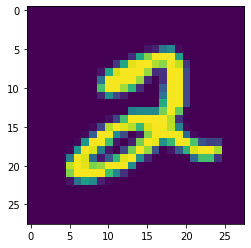

In [94]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[5].reshape((28, 28)))
print(x_train.shape)

In [96]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)
